<a href="https://colab.research.google.com/github/BerkayArdaa/ML_Binnary_Classification_For_Healthcare/blob/main/ML_Project_HW2_result3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
df = pd.read_csv("Dataset/diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
# import tensort
!pip install tensorflow scikit-learn matplotlib pandas numpy



In [6]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers



In [7]:
# Load the Dataset
df = pd.read_csv("/content/Dataset/diabetes_binary_health_indicators_BRFSS2015.csv")
print("Dataset shape:", df.shape)
df.head()



Dataset shape: (253680, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [8]:
# Separate Inputs and Target
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

print("Input features:", X.shape[1])
print("Target distribution:")
print(y.value_counts(normalize=True))


Input features: 21
Target distribution:
Diabetes_binary
0.0    0.860667
1.0    0.139333
Name: proportion, dtype: float64


In [9]:
# Split and Normalize Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [33]:


# Model Architecture
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # sigmoid for binary classification
])

# Compile Model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()





Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,225 (16.50 KB)

 Non-trainable params: 192 (768.00 B)

In [34]:
# Train the Model
# Early stopping & learning rate scheduler
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)


history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=32,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)



Epoch 1/150
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8430 - loss: 0.3639 - val_accuracy: 0.8664 - val_loss: 0.3119 - learning_rate: 0.0010
Epoch 2/150
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8604 - loss: 0.3249 - val_accuracy: 0.8678 - val_loss: 0.3094 - learning_rate: 0.0010
Epoch 3/150
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8633 - loss: 0.3191 - val_accuracy: 0.8679 - val_loss: 0.3098 - learning_rate: 0.0010
Epoch 4/150
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8634 - loss: 0.3203 - val_accuracy: 0.8669 - val_loss: 0.3103 - learning_rate: 0.0010
Epoch 5/150
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8640 - loss: 0.3183 - val_accuracy: 0.8687 - val_loss: 0.3093 - learning_rate: 0.0010
Epoch 6/150
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8630 - loss: 0.3194 - val_accuracy: 0.8685 - val_loss: 0.3086 - learning_rate: 0.0010
Epoch 7/150
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accura

In [35]:
# Evaluate Performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_acc:.4f}")



1586/1586 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8644 - loss: 0.3139
✅ Test Accuracy: 0.8647


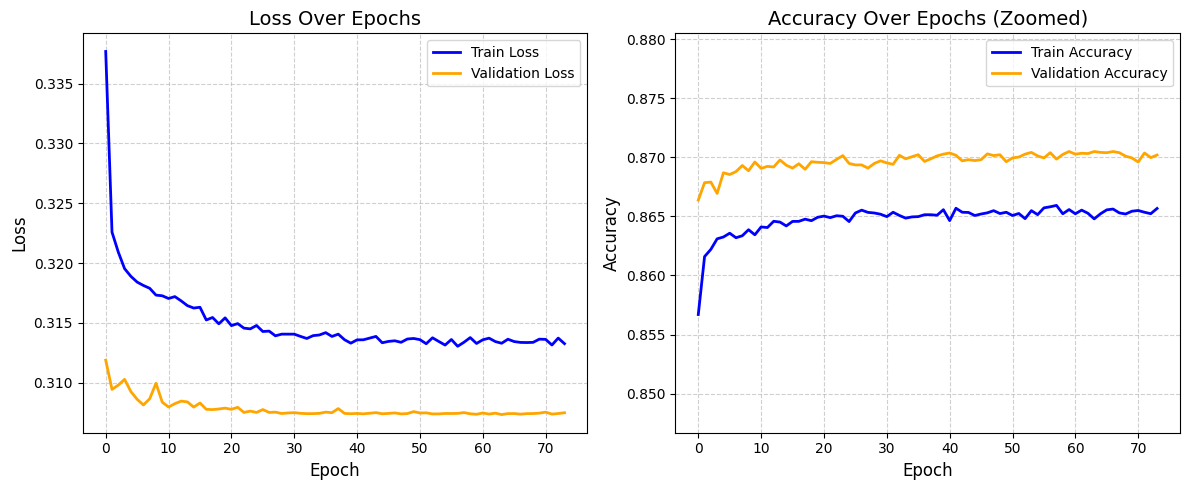

✅ learning_curves_accuracy_zoomed.png saved successfully!


In [36]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12,5))

# --- Plot Loss ---
axs[0].plot(history.history['loss'], label='Train Loss', color='blue', linewidth=2)
axs[0].plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
axs[0].set_title('Loss Over Epochs', fontsize=14)
axs[0].set_xlabel('Epoch', fontsize=12)
axs[0].set_ylabel('Loss', fontsize=12)
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.6)

# --- Plot Accuracy (Zoomed Y-axis) ---
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

axs[1].plot(train_acc, label='Train Accuracy', color='blue', linewidth=2)
axs[1].plot(val_acc, label='Validation Accuracy', color='orange', linewidth=2)
axs[1].set_title('Accuracy Over Epochs (Zoomed)', fontsize=14)
axs[1].set_xlabel('Epoch', fontsize=12)
axs[1].set_ylabel('Accuracy', fontsize=12)
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.6)

# 🔍 Zoom: y eksenini dinamik olarak accuracy değerlerine göre yakınlaştır
min_acc = min(min(train_acc), min(val_acc))
max_acc = max(max(train_acc), max(val_acc))
axs[1].set_ylim(min_acc - 0.01, max_acc + 0.01)  # yalnızca biraz marj ekle

# Daha sık aralıklar için
axs[1].yaxis.set_major_locator(plt.MultipleLocator(0.005))

plt.tight_layout()
fig.savefig("learning_curves_accuracy_zoomed.png", bbox_inches='tight', dpi=300)
plt.show()

print("✅ learning_curves_accuracy_zoomed.png saved successfully!")


In [37]:
# Generate Predictions and Reports
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_test) >= 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Confusion Matrix:
[[42728   939]
 [ 5927  1142]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43667
         1.0       0.55      0.16      0.25      7069

    accuracy                           0.86     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.86      0.83     50736



In [38]:
# Save Results
plt.show()

# --- Then: save to file
# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Optimized Test Accuracy: {test_acc:.4f}")
print(f"🔻 Test Loss: {test_loss:.4f}")



✅ Optimized Test Accuracy: 0.8647
🔻 Test Loss: 0.3146


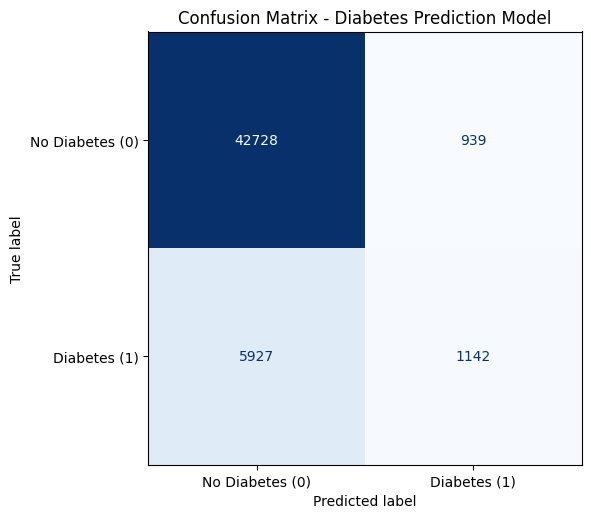

✅ confusion_matrix.png saved successfully!


In [39]:
# --- Confusion Matrix Plot ---
from sklearn.metrics import ConfusionMatrixDisplay

# draw
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes (0)', 'Diabetes (1)'])

fig_cm, ax_cm = plt.subplots(figsize=(6,6))
disp.plot(ax=ax_cm, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - Diabetes Prediction Model")
plt.tight_layout()

# save
fig_cm.savefig("confusion_matrix.png", bbox_inches='tight')
plt.show()
print("✅ confusion_matrix.png saved successfully!")
